# Mojave mean climate models

The purpose of this analysis is to compare the merits of several ways to predict MAT and MAP for locations across the Mojave region. Candidates are:

1. PRISM model, which has a 30year (1981-2010) normal precipitation and temperature products for the contiguous US. Data are [here](http://www.prism.oregonstate.edu/normals/).

2. WorldClim - gridded climate variables downscaled from GCM data. See [here](http://worldclim.org/current). There are a couple versions of this dataset and I'm not sure exactly which was used - maybe Jenny can fill in the details of this.

3. A linear model with elevation, latitude, and longitude as independent variables that predicts MAT and MAP, fitted to regional climate summary data (see below).

These three models were compared to the MAT and MAP data gathered from WRCC [here](http://www.wrcc.dri.edu/Climate/summaries.php/) - from the annual column of the climate summary pages. There are different periods of record available and it is unclear which is found in the input data. Ron may remember which he used.

## Summary

Both PRISM and WorldClim do a fine job of predicting MAT and MAP in the Mojave region, at least as compared to the stations we have picked out from WRCC. PRISM does seem to have a very slight edge though, particularly with precipitation data.

The multiple regression model does pretty well for temperature, but not very well for precipitation.

In [5]:
library('repr')
options(repr.plot.width=5, repr.plot.height=5)
# Original data from Jenny and with PRISM added is on the google drive
dat <- read.table('~/data/gdrive_berkeley/MojaveCarbon/Data/weather_stat_data_plus_WC_and_PRISM.csv', header=T,sep=',')

## PRISM vs WorldClim fits to Mojave MAT

PRISM and WorldClim fits to the temperature data are quite similar. High R^2^, low residual standard error. PRISM may have a very slight edge at warmer sits.


Call:
lm(formula = dat$tmean_PRISMn ~ dat$ext_T)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4986 -0.3009  0.0245  0.3617  4.4505 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.68995    0.20474    3.37 0.000991 ***
dat$ext_T    0.96718    0.01342   72.08  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8441 on 130 degrees of freedom
Multiple R-squared:  0.9756,	Adjusted R-squared:  0.9754 
F-statistic:  5196 on 1 and 130 DF,  p-value: < 2.2e-16



Call:
lm(formula = dat$WC_Tavg ~ dat$ext_T)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6548 -0.4101  0.0127  0.5197  4.3443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48780    0.25439   1.918   0.0574 .  
dat$ext_T    0.95720    0.01667  57.415   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 130 degrees of freedom
Multiple R-squared:  0.9621,	Adjusted R-squared:  0.9618 
F-statistic:  3297 on 1 and 130 DF,  p-value: < 2.2e-16


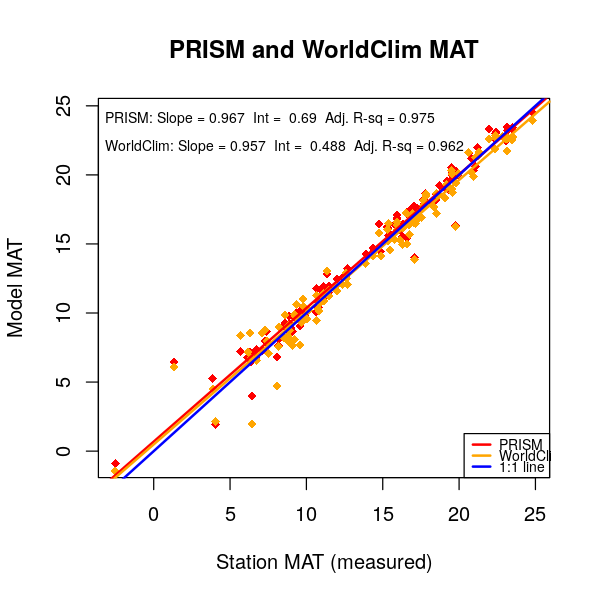

In [6]:
#Simple linear models of PRISM and noaa temperature
PR_T.lm <- lm(dat$tmean_PRISMn ~ dat$ext_T)
summary(PR_T.lm)
WC_T.lm <- lm(dat$WC_Tavg ~ dat$ext_T)
summary(WC_T.lm)

PR_coef <- round(coef(PR_T.lm), 3) # extract coefficients
PR_R2 <- round(summary(PR_T.lm)$adj.r.squared, 3) # extract R2
WC_coef <- round(coef(WC_T.lm), 3) # extract coefficients
WC_R2 <- round(summary(WC_T.lm)$adj.r.squared, 3) # extract R2

plot(dat$tmean_PRISMn ~ dat$ext_T, main='PRISM and WorldClim MAT',
       ylab="Model MAT", xlab="Station MAT (measured)", pch=18, col='red')
points(dat$WC_Tavg ~ dat$ext_T, pch=18, col='orange')
#legend("bottomright", legend="obs", pch=18, col='gray') 
abline(PR_T.lm, col='red',lwd=2)
abline(WC_T.lm, col='orange',lwd=2)
abline(0,1, col='blue',lwd=2)
legend("bottomright", legend=c("PRISM", "WorldClim", "1:1 line"),
       lwd=2, col=c('red', 'orange', 'blue'), cex=0.7)
text(-4, 24, paste("PRISM: Slope =", PR_coef[[2]], " Int = ", 
                   PR_coef[[1]], " Adj. R-sq =", PR_R2), cex=0.7, pos=4)
text(-4, 22, paste("WorldClim: Slope =", WC_coef[[2]], " Int = ", 
                   WC_coef[[1]], " Adj. R-sq =", WC_R2), cex=0.7, pos=4)

### Model diagnostics - PRISM

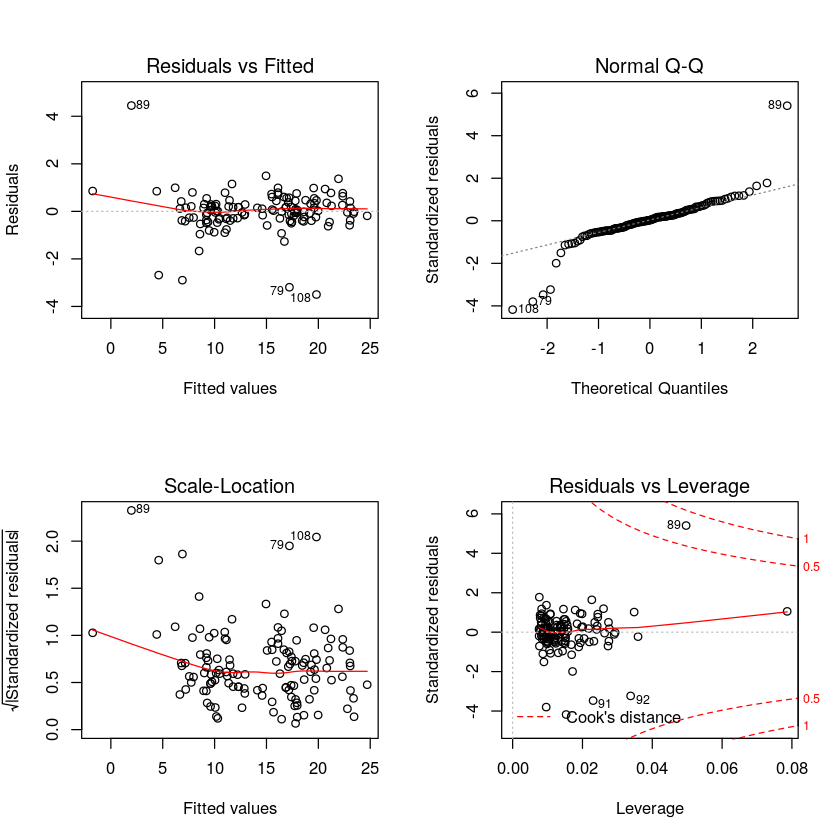

In [7]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(PR_T.lm)

### Model diagnostics - WorldClim

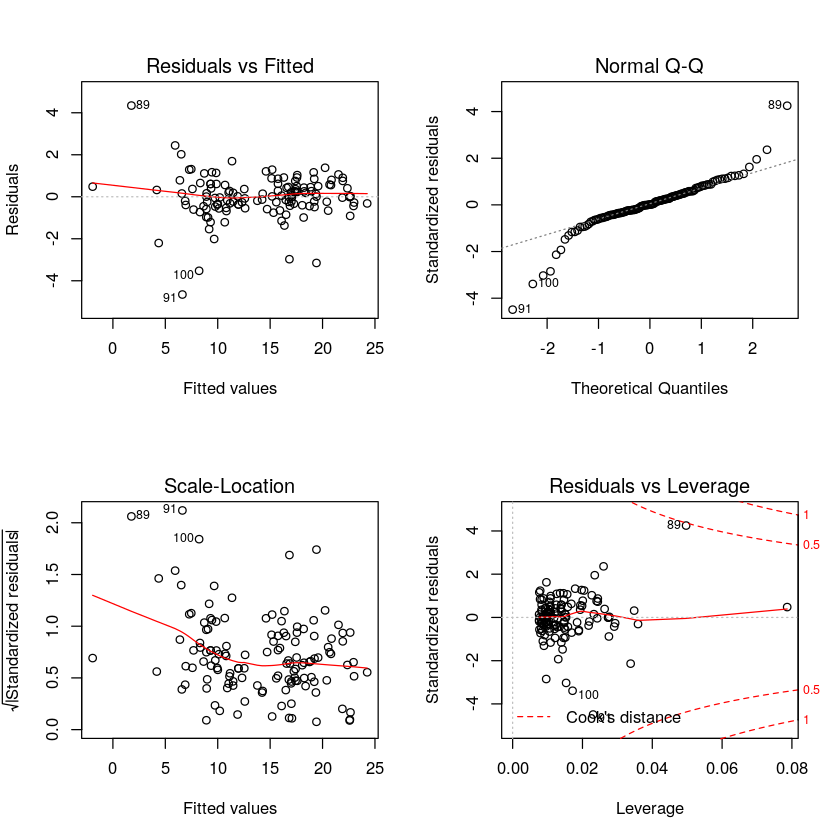

In [8]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(WC_T.lm)

## PRISM vs WorldClim fits to Mojave MAP

PRISM and WorldClim fits to the precipitation data are also pretty similar, though PRISM might have a slightly bigger advantage (Higher R^2^, lower residual standard error). WorldClim seems to overestimate precipitation at the low end of the scale, while PRISM overestimates at the high end of the scale. There are fewer high PPT sites though.


Call:
lm(formula = dat$ppt_PRISMn ~ dat$ext_P)

Residuals:
   Min     1Q Median     3Q    Max 
-75.94 -13.51  -3.91   7.98 320.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.07218    6.78014   0.453    0.651    
dat$ext_P    1.03380    0.02865  36.088   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.77 on 130 degrees of freedom
Multiple R-squared:  0.9092,	Adjusted R-squared:  0.9085 
F-statistic:  1302 on 1 and 130 DF,  p-value: < 2.2e-16



Call:
lm(formula = dat$WC_Ptot ~ dat$ext_P)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.436  -22.573   -7.271   20.367  256.418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.86735    8.68371   2.403   0.0177 *  
dat$ext_P    0.96610    0.03669  26.332   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.81 on 130 degrees of freedom
Multiple R-squared:  0.8421,	Adjusted R-squared:  0.8409 
F-statistic: 693.4 on 1 and 130 DF,  p-value: < 2.2e-16


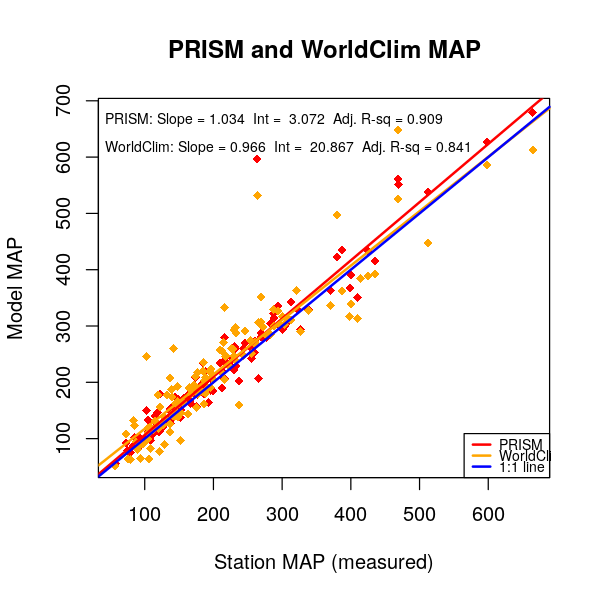

In [9]:
#Simple linear models of PRISM and noaa temperature
PR_P.lm <- lm(dat$ppt_PRISMn ~ dat$ext_P)
summary(PR_P.lm)
WC_P.lm <- lm(dat$WC_Ptot ~ dat$ext_P)
summary(WC_P.lm)

PR_coef <- round(coef(PR_P.lm), 3) # extract coefficients
PR_R2 <- round(summary(PR_P.lm)$adj.r.squared, 3) # extract R2
WC_coef <- round(coef(WC_P.lm), 3) # extract coefficients
WC_R2 <- round(summary(WC_P.lm)$adj.r.squared, 3) # extract R2

options(repr.plot.width=5, repr.plot.height=5)
plot(dat$ppt_PRISMn ~ dat$ext_P, main='PRISM and WorldClim MAP',
       ylab="Model MAP", xlab="Station MAP (measured)", pch=18, col='red')
points(dat$WC_Ptot ~ dat$ext_P, pch=18, col='orange')
#legend("bottomright", legend="obs", pch=18, col='gray') 
abline(PR_P.lm, col='red',lwd=2)
abline(WC_P.lm, col='orange',lwd=2)
abline(0,1, col='blue',lwd=2)
legend("bottomright", legend=c("PRISM", "WorldClim", "1:1 line"),
       lwd=2, col=c('red', 'orange', 'blue'), cex=0.7)
text(25, 665, paste("PRISM: Slope =", PR_coef[[2]], " Int = ", 
                   PR_coef[[1]], " Adj. R-sq =", PR_R2), cex=0.7, pos=4)
text(25, 615, paste("WorldClim: Slope =", WC_coef[[2]], " Int = ", 
                   WC_coef[[1]], " Adj. R-sq =", WC_R2), cex=0.7, pos=4)

### Model diagnostics - PRISM

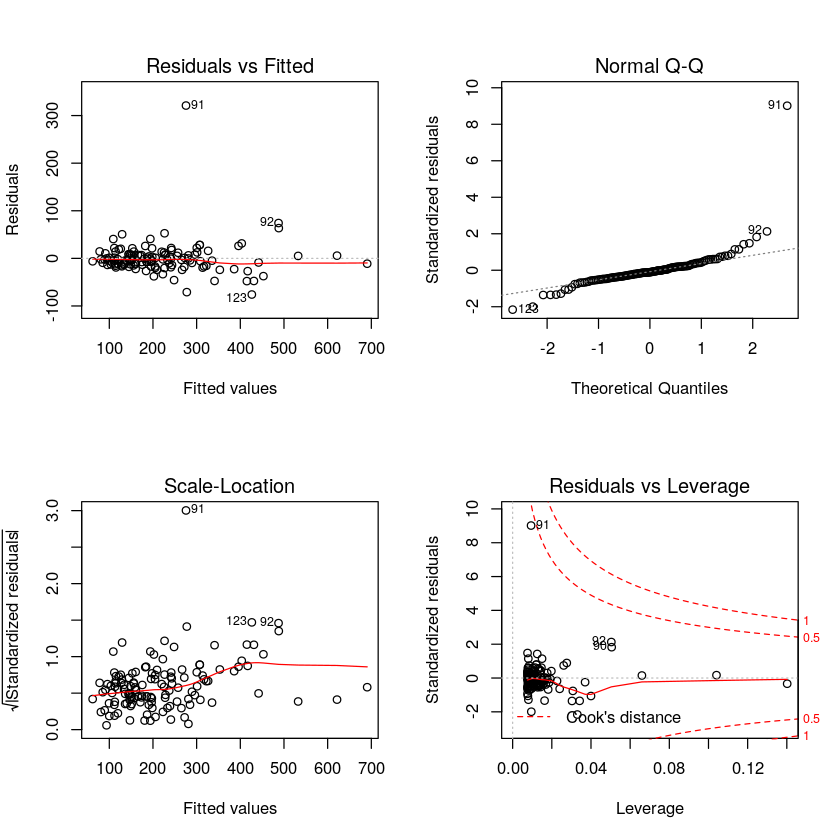

In [10]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(PR_P.lm)

### Model diagnostics - Worldclim

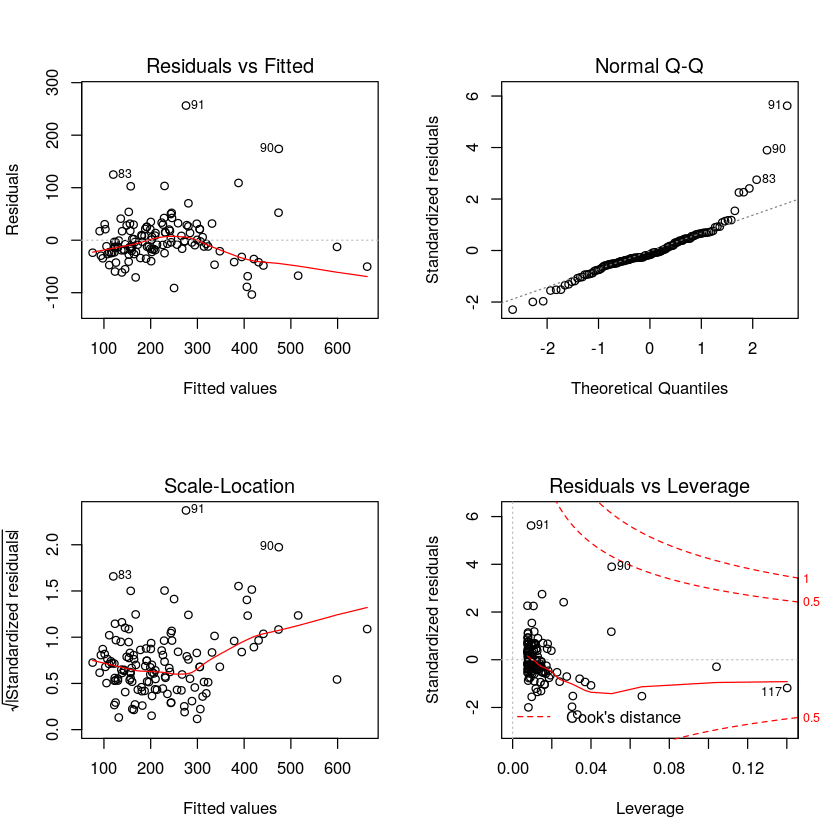

In [11]:
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow=c(2,2))
plot(WC_P.lm)

## Multiple regression (lat + lon + elev) prediction of climate

Ron created a multiple regression model using lat, long, and elevation to predict MAT and MAP - I'm trying to do the same here. I think I have the structure and am assessing the fits correctly. However, the coefficients and fit statistics that come out of R are much different than his and I'm not sure why yet.

### MAT model

This fits the station data pretty well. Almost as well as PRISM and WorldClim.


Call:
lm(formula = ext_T ~ lat + long + elev, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-5.207 -1.060  0.026  1.068  3.890 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 82.9729565  8.4166855   9.858  < 2e-16 ***
lat         -0.8493745  0.1084587  -7.831  1.6e-12 ***
long         0.2684300  0.0684303   3.923 0.000142 ***
elev        -0.0057415  0.0002806 -20.459  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.534 on 128 degrees of freedom
Multiple R-squared:  0.9239,	Adjusted R-squared:  0.9221 
F-statistic: 517.9 on 3 and 128 DF,  p-value: < 2.2e-16


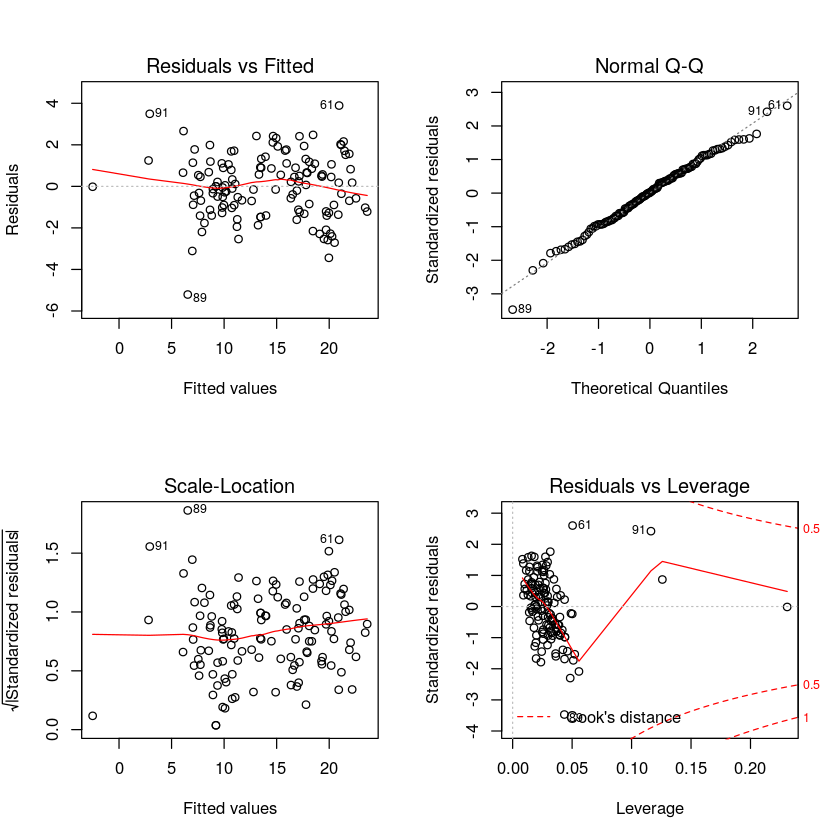

In [12]:
tav_mr_model <- lm(ext_T ~ lat + long + elev, data=dat)
summary(tav_mr_model)
par(mfrow=c(2,2))
plot(tav_mr_model)

### PPT

This model doesn't do as good a job. Ron's fit statistics were also pretty low (but still higher than what R says).


Call:
lm(formula = ext_P ~ lat + long + elev, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-130.61  -61.39  -25.35   31.79  506.93 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 588.98026  545.21809   1.080    0.282    
lat          -9.20163    7.02576  -1.310    0.193    
long          1.15293    4.43279   0.260    0.795    
elev          0.08038    0.01818   4.421 2.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 99.37 on 128 degrees of freedom
Multiple R-squared:  0.1893,	Adjusted R-squared:  0.1703 
F-statistic: 9.963 on 3 and 128 DF,  p-value: 5.985e-06


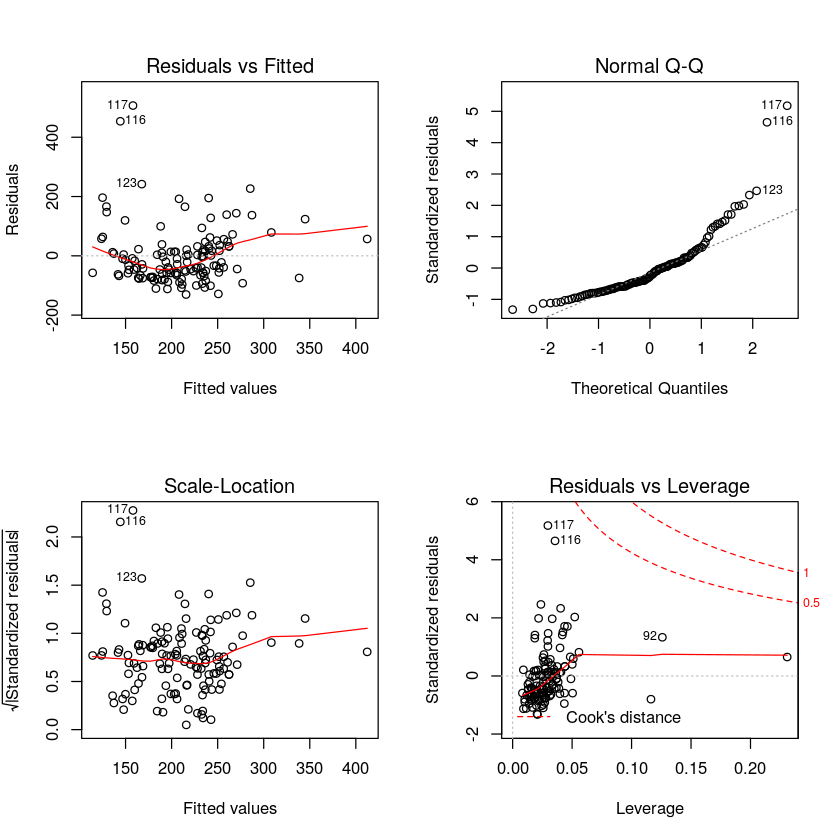

In [13]:
ppt_mr_model <- lm(ext_P ~ lat + long + elev, data=dat)
summary(ppt_mr_model)
par(mfrow=c(2,2))
plot(ppt_mr_model)

## Residual plots of PRISM/Worldclim/Regression together

Demonstrations of how the residuals from each of the MAT and MAP models line up.

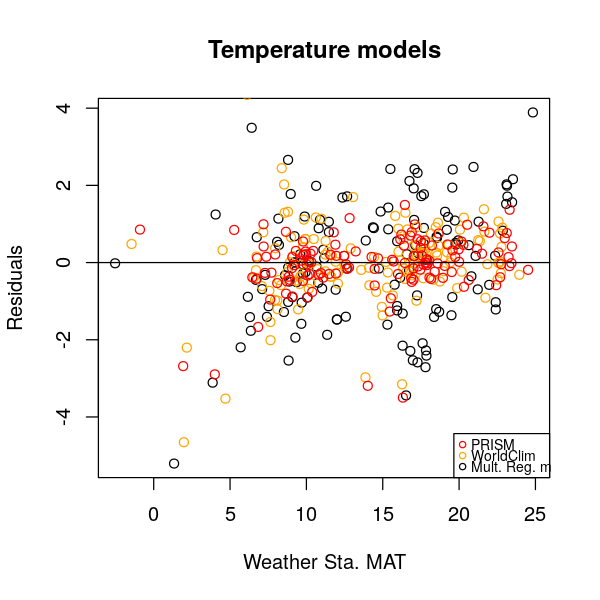

In [14]:
options(repr.plot.width=5, repr.plot.height=5)
plot(dat$ext_T, resid(tav_mr_model), ylab="Residuals", xlab="Weather Sta. MAT",
     main="Temperature models")
points(dat$WC_Tavg, resid(WC_T.lm), col='orange')
points(dat$tmean_PRISMn, resid(PR_T.lm), col='red')
abline(0, 0)                  # the horizon 
legend("bottomright", legend=c("PRISM", "WorldClim", "Mult. Reg. model"),
       pch=1, col=c('red', 'orange', 'black'), cex=0.7)

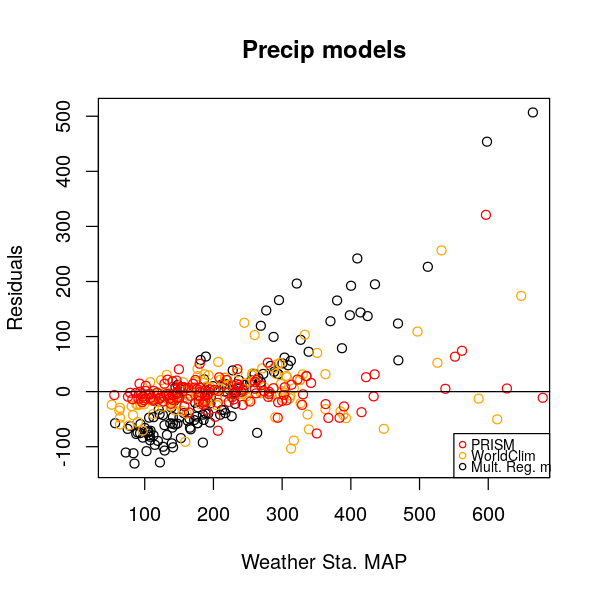

In [106]:
options(repr.plot.width=5, repr.plot.height=5)
plot(dat$ext_P, resid(ppt_mr_model), ylab="Residuals", xlab="Weather Sta. MAP",
     main="Precip models")
points(dat$WC_Ptot, resid(WC_P.lm), col='orange')
points(dat$ppt_PRISMn, resid(PR_P.lm), col='red')
abline(0, 0)                  # the horizon 
legend("bottomright", legend=c("PRISM", "WorldClim", "Mult. Reg. model"),
       pch=1, col=c('red', 'orange', 'black'), cex=0.7)

## Kyle Canyon and Fish Lake Valley comparison

Comparing PRISM, WorldClim, and the multiple regression model at Kyle Canyon and Fish Lake Valley

In [37]:
datKF <- read.table('~/data/gdrive_berkeley/MojaveCarbon/Data/KyleFLV_climatecomp.csv', header=T,sep=',')

In [41]:
datKF$MRmodelMAT <- predict(tav_mr_model, data.frame(lat=datKF$lat, long=datKF$lon, elev=datKF$elev))
datKF$MRmodelMAP <- predict(ppt_mr_model, data.frame(lat=datKF$lat, long=datKF$lon, elev=datKF$elev))
#predict(tav_mr_model)


write.table(datKF, file = '~/data/gdrive_berkeley/MojaveCarbon/Data/KyleFLV_climatecomp.csv',
            sep=',', row.names=FALSE, quote=FALSE)

site,desc,lat,lon,elev,WCmat,WCmap,PRISMmat,PRISMmap,MRmodelMAT,MRmodelMAP
FLV_A_avg,Saltbush,37.83880,-118.0757,1482,11.233333,131,12.28,125.90,10.629697,223.7865
FLV_B,Blackbrush,37.88123,-118.1804,1745,9.441667,157,10.43,169.56,9.055545,244.4144
FLV_C,Sagebrush,37.85537,-118.2301,2140,7.033333,201,7.48,228.10,6.796285,276.3438
FLV_D,Pinyon,37.87129,-118.2964,2602,3.783333,296,5.04,319.64,4.112416,313.2550
KC_C,Creosote,36.32960,-115.2955,840,17.383333,115,18.70,117.28,16.343904,189.2772
KC_B,Blackbrush,36.27889,-115.4549,1400,13.875000,199,15.05,247.32,13.128968,234.5710
KC_P,PinyonJuniper,36.26949,-115.5326,1750,11.583333,262,12.87,330.23,11.106559,262.6996
KC_F,Fir,36.26279,-115.6184,2150,9.366667,335,9.29,553.82,8.792638,294.8131


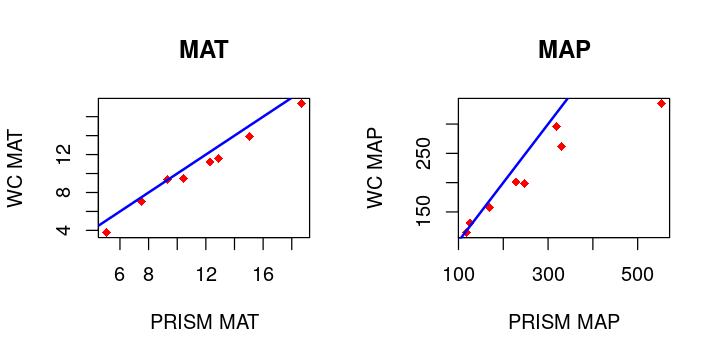

In [49]:
datKF
options(repr.plot.width=6, repr.plot.height=3)
par(mfrow=c(1,2))
plot(datKF$WCmat ~ datKF$PRISMmat, main='MAT',
       ylab="WC MAT", xlab="PRISM MAT", pch=18, col='red')
abline(0,1, col='blue',lwd=2)
plot(datKF$WCmap ~ datKF$PRISMmap, main='MAP',
       ylab="WC MAP", xlab="PRISM MAP", pch=18, col='red')
abline(0,1, col='blue',lwd=2)

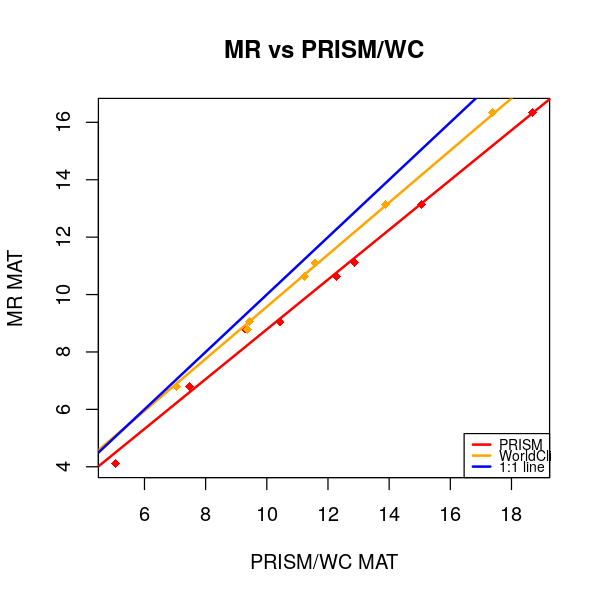

In [44]:
options(repr.plot.width=5, repr.plot.height=5)
plot(datKF$MRmodelMAT ~ datKF$PRISMmat, main='MR vs PRISM/WC',
       ylab="MR MAT", xlab="PRISM/WC MAT", pch=18, col='red')
points(datKF$MRmodelMAT ~ datKF$WCmat, pch=18, col='orange')
#legend("bottomright", legend="obs", pch=18, col='gray') 
abline(lm(datKF$MRmodelMAT ~ datKF$PRISMmat), col='red',lwd=2)
abline(lm(datKF$MRmodelMAT ~ datKF$WCmat), col='orange',lwd=2)
abline(0,1, col='blue',lwd=2)
legend("bottomright", legend=c("PRISM", "WorldClim", "1:1 line"),
       lwd=2, col=c('red', 'orange', 'blue'), cex=0.7)
#text(6, 16, paste("PRISM: Slope =", PR_coef[[2]], " Int = ", 
#                   PR_coef[[1]], " Adj. R-sq =", PR_R2), cex=0.7, pos=4)
#text(6, 14.5, paste("WorldClim: Slope =", WC_coef[[2]], " Int = ", 
#                   WC_coef[[1]], " Adj. R-sq =", WC_R2), cex=0.7, pos=4)

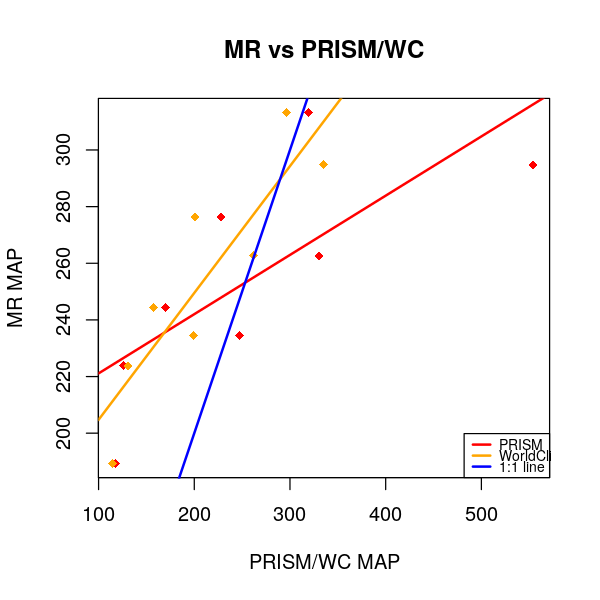

In [45]:
options(repr.plot.width=5, repr.plot.height=5)
plot(datKF$MRmodelMAP ~ datKF$PRISMmap, main='MR vs PRISM/WC',
       ylab="MR MAP", xlab="PRISM/WC MAP", pch=18, col='red')
points(datKF$MRmodelMAP ~ datKF$WCmap, pch=18, col='orange')
#legend("bottomright", legend="obs", pch=18, col='gray') 
abline(lm(datKF$MRmodelMAP ~ datKF$PRISMmap), col='red',lwd=2)
abline(lm(datKF$MRmodelMAP ~ datKF$WCmap), col='orange',lwd=2)
abline(0,1, col='blue',lwd=2)
legend("bottomright", legend=c("PRISM", "WorldClim", "1:1 line"),
       lwd=2, col=c('red', 'orange', 'blue'), cex=0.7)
#text(25, 665, paste("PRISM: Slope =", PR_coef[[2]], " Int = ", 
#                   PR_coef[[1]], " Adj. R-sq =", PR_R2), cex=0.7, pos=4)
#text(25, 615, paste("WorldClim: Slope =", WC_coef[[2]], " Int = ", 
#                   WC_coef[[1]], " Adj. R-sq =", WC_R2), cex=0.7, pos=4)